In [199]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing functions
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [200]:
import geopy as gp

In [201]:
from geopy.distance import geodesic

In [202]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [204]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [205]:
df.shape

(50000, 8)

In [206]:
not_possible=0
zeroes=0

for i in range(50000):
    if df["longitude_of_pickup"][i]==0:
        zeroes+=1
    if df["latitude_of_pickup"][i]==0:
        zeroes+=1
    if df["longitude_of_dropoff"][i]==0:
        zeroes+=1
    if df["latitude_of_dropoff"][i]==0:
        zeroes+=1
    if df["longitude_of_pickup"][i]>90 or df["longitude_of_pickup"][i]<-90:
        print(df["longitude_of_pickup"][i],"1",i)
        not_possible+=1
    if df["latitude_of_pickup"][i]>90 or df["latitude_of_pickup"][i]<-90:
        print(df["latitude_of_pickup"][i],"2",i)
        not_possible+=1
    if df["longitude_of_dropoff"][i]>90 or df["longitude_of_dropoff"][i]<-90:
        print(df["longitude_of_dropoff"][i],"3",i)
        not_possible+=1
    if df["latitude_of_dropoff"][i]>90 or df["latitude_of_dropoff"][i]<-90:
        print(df["longitude_of_dropoff"][i],"4",i)
        not_possible+=1

print(zeroes,not_possible)    

401.083332 2 5686
3823 1


In [207]:
df = df.replace({0: np.nan})

In [208]:
df.dropna(axis=0,inplace=True)

In [209]:
df.drop(5686,axis=0,inplace=True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48837 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             48837 non-null  object 
 1   amount                48837 non-null  float64
 2   date_time_of_pickup   48837 non-null  object 
 3   longitude_of_pickup   48837 non-null  float64
 4   latitude_of_pickup    48837 non-null  float64
 5   longitude_of_dropoff  48837 non-null  float64
 6   latitude_of_dropoff   48837 non-null  float64
 7   no_of_passenger       48837 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.4+ MB


In [211]:
df['pickup'] = [', '.join(str(x) for x in y) for y in map(tuple, df[['latitude_of_pickup', 'longitude_of_pickup']].values)]

In [212]:
df['dropoff'] = [', '.join(str(x) for x in y) for y in map(tuple, df[['latitude_of_dropoff', 'longitude_of_dropoff']].values)]

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48837 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             48837 non-null  object 
 1   amount                48837 non-null  float64
 2   date_time_of_pickup   48837 non-null  object 
 3   longitude_of_pickup   48837 non-null  float64
 4   latitude_of_pickup    48837 non-null  float64
 5   longitude_of_dropoff  48837 non-null  float64
 6   latitude_of_dropoff   48837 non-null  float64
 7   no_of_passenger       48837 non-null  float64
 8   pickup                48837 non-null  object 
 9   dropoff               48837 non-null  object 
dtypes: float64(6), object(4)
memory usage: 4.1+ MB


In [214]:
df.drop(columns=["longitude_of_pickup","latitude_of_pickup","latitude_of_dropoff","longitude_of_dropoff","unique_id","date_time_of_pickup"],inplace=True)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48837 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   amount           48837 non-null  float64
 1   no_of_passenger  48837 non-null  float64
 2   pickup           48837 non-null  object 
 3   dropoff          48837 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.9+ MB


In [216]:
df.head()

,amount,no_of_passenger,pickup,dropoff
0,4.5,1.0,"40.721319, -73.844311","40.712278, -73.84161"
1,16.9,1.0,"40.711303, -74.016048","40.782004, -73.979268"
2,5.7,2.0,"40.76127, -73.982738","40.750562, -73.991242"
3,7.7,1.0,"40.733143, -73.98713","40.758092, -73.991567"
4,5.3,1.0,"40.768008, -73.968095","40.783762, -73.956655"


In [217]:
df.isnull().sum()

amount             0
no_of_passenger    0
pickup             0
dropoff            0
dtype: int64

In [218]:
df.shape

(48837, 4)

In [219]:
df.head()

,amount,no_of_passenger,pickup,dropoff
0,4.5,1.0,"40.721319, -73.844311","40.712278, -73.84161"
1,16.9,1.0,"40.711303, -74.016048","40.782004, -73.979268"
2,5.7,2.0,"40.76127, -73.982738","40.750562, -73.991242"
3,7.7,1.0,"40.733143, -73.98713","40.758092, -73.991567"
4,5.3,1.0,"40.768008, -73.968095","40.783762, -73.956655"


In [220]:
pickup = []
dropoff = []
distance = []

for co1 in df["pickup"]:
    pickup.append(co1)
for co2 in df["dropoff"]:
    dropoff.append(co2)
    
for i in range(len(pickup)):
    dis=geodesic(pickup[i],dropoff[i]).miles
    distance.append(dis)
    

In [221]:
df["distance"]=distance

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48837 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   amount           48837 non-null  float64
 1   no_of_passenger  48837 non-null  float64
 2   pickup           48837 non-null  object 
 3   dropoff          48837 non-null  object 
 4   distance         48837 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.2+ MB


In [223]:
df.head()

,amount,no_of_passenger,pickup,dropoff,distance
0,4.5,1.0,"40.721319, -73.844311","40.712278, -73.84161",0.639764
1,16.9,1.0,"40.711303, -74.016048","40.782004, -73.979268",5.246511
2,5.7,2.0,"40.76127, -73.982738","40.750562, -73.991242",0.863167
3,7.7,1.0,"40.733143, -73.98713","40.758092, -73.991567",1.737223
4,5.3,1.0,"40.768008, -73.968095","40.783762, -73.956655",1.241710


In [224]:
df.drop(columns=["pickup","dropoff"],inplace=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48837 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   amount           48837 non-null  float64
 1   no_of_passenger  48837 non-null  float64
 2   distance         48837 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [226]:
correlation_mat = df.corr()

<AxesSubplot:>

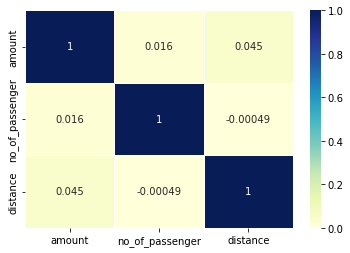

In [227]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

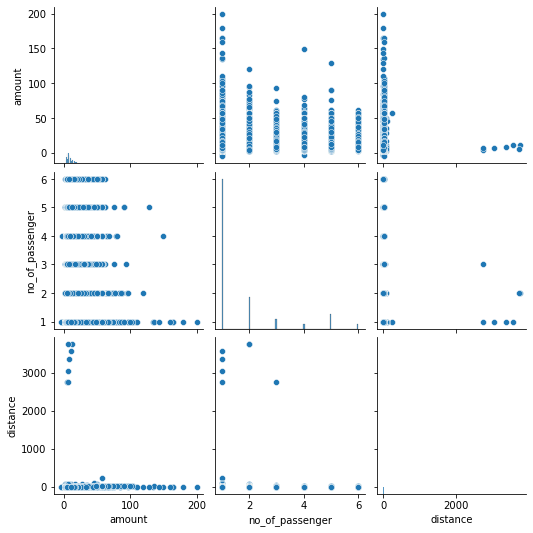

In [228]:
sns.pairplot(df)
plt.show()

In [229]:
df

,amount,no_of_passenger,distance
0,4.5,1.0,0.639764
1,16.9,1.0,5.246511
2,5.7,2.0,0.863167
3,7.7,1.0,1.737223
4,5.3,1.0,1.241710
...,...,...,...
49995,15.0,1.0,3.066758
49996,7.5,1.0,0.542938
49997,6.9,1.0,1.404655
49998,4.5,2.0,0.414219


In [230]:
df.describe()

,amount,no_of_passenger,distance
count,48837.000000,48837.000000,48837.000000
mean,11.367257,1.674796,2.579408
std,9.665188,1.288865,39.695012
min,-5.000000,1.000000,0.000000
25%,6.000000,1.000000,0.784897
50%,8.500000,1.000000,1.342410
75%,12.500000,2.000000,2.449735
max,200.000000,6.000000,3752.574645


In [231]:
X = df.drop(columns=["amount"])
Y = df["amount"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [232]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

In [233]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [234]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

5.929784605611654

In [235]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred)

89.39537075868253

In [236]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_test, y_pred)

0.7427619912279099